In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('df_filtrado.csv',sep=',')

In [3]:
df.head()

Data  Hora (UTC) Temp. Ins. (C) Temp. Max. (C) Temp. Min. (C)  \
0  24/01/2023        1000           18,6           18,6           18,0   
1  24/01/2023        1100           20,6           20,7           18,6   
2  24/01/2023        1200           23,6           23,8           20,6   
3  24/01/2023        1300           24,0           24,9           23,2   
4  24/01/2023        1400           25,8           25,8           23,7   

  Umi. Ins. (%) Umi. Max. (%) Umi. Min. (%) Pto Orvalho Ins. (C)  \
0          89,0          91,0          89,0                 16,8   
1          82,0          89,0          82,0                 17,5   
2          68,0          82,0          68,0                 17,5   
3          66,0          69,0          63,0                 17,3   
4          58,0          67,0          58,0                 17,0   

  Pto Orvalho Max. (C) Pto Orvalho Min. (C) Pressao Ins. (hPa)  \
0                 16,9                 16,5              885,5   
1                 18,0                 16,8              886,1   
2                 18,1                 17,1              886,2   
3                 17,8                 16,5              886,4   
4                 17,8                 16,4              886,3   

  Pressao Max. (hPa) Pressao Min. (hPa) Vel. Vento (m/s) Dir. Vento (m/s)  \
0              885,5              884,9              1,1            277,0   
1              886,1              885,5              1,7            320,0   
2              886,3              886,1              2,7            317,0   
3              886,4              886,1              3,7            297,0   
4              886,4              886,2              4,2            320,0   

  Raj. Vento (m/s) Radiacao (KJ/m²) Chuva (mm)  
0              4,7           196,80        0,0  
1              4,6           761,90        0,0  
2              6,7          1810,00        0,0  
3              9,1          2580,00        0,0  
4              8,3          2922,10        0,0

In [4]:
df.isnull().sum()

Data                     0
Hora (UTC)               0
Temp. Ins. (C)          14
Temp. Max. (C)          21
Temp. Min. (C)          21
Umi. Ins. (%)           14
Umi. Max. (%)           21
Umi. Min. (%)           22
Pto Orvalho Ins. (C)    14
Pto Orvalho Max. (C)    21
Pto Orvalho Min. (C)    21
Pressao Ins. (hPa)      14
Pressao Max. (hPa)      21
Pressao Min. (hPa)      21
Vel. Vento (m/s)        19
Dir. Vento (m/s)        20
Raj. Vento (m/s)        21
Radiacao (KJ/m²)        14
Chuva (mm)              16
dtype: int64

In [5]:
df.index

RangeIndex(start=0, stop=8784, step=1)

In [6]:
df.describe()

Hora (UTC)
count  8784.000000
mean   1550.000000
std     345.224904
min    1000.000000
25%    1275.000000
50%    1550.000000
75%    1825.000000
max    2100.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  8784 non-null   object
 1   Hora (UTC)            8784 non-null   int64 
 2   Temp. Ins. (C)        8770 non-null   object
 3   Temp. Max. (C)        8763 non-null   object
 4   Temp. Min. (C)        8763 non-null   object
 5   Umi. Ins. (%)         8770 non-null   object
 6   Umi. Max. (%)         8763 non-null   object
 7   Umi. Min. (%)         8762 non-null   object
 8   Pto Orvalho Ins. (C)  8770 non-null   object
 9   Pto Orvalho Max. (C)  8763 non-null   object
 10  Pto Orvalho Min. (C)  8763 non-null   object
 11  Pressao Ins. (hPa)    8770 non-null   object
 12  Pressao Max. (hPa)    8763 non-null   object
 13  Pressao Min. (hPa)    8763 non-null   object
 14  Vel. Vento (m/s)      8765 non-null   object
 15  Dir. Vento (m/s)      8764 non-null   

In [8]:
df.columns

Index(['Data', 'Hora (UTC)', 'Temp. Ins. (C)', 'Temp. Max. (C)',
       'Temp. Min. (C)', 'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)',
       'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)',
       'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)',
       'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)',
       'Radiacao (KJ/m²)', 'Chuva (mm)'],
      dtype='object')

<h2>Checkpoint 1</h2>

In [9]:
df_cleaned = df.copy()

In [10]:
df_cleaned['hora'] = df_cleaned['Hora (UTC)'].astype(str).str.zfill(4)  # Ensure 'hora' has 4 digits
df_cleaned['data_hora'] = df_cleaned['Data'] + ' ' + df_cleaned['hora']
df_cleaned['data_hora'] = pd.to_datetime(df_cleaned['data_hora'], format='%d/%m/%Y %H%M')
# Estabelecer 'data_hora' como o index
df_cleaned.set_index('data_hora', inplace=True)

In [11]:
#Tratamento dos tipos de dados.
for col in df_cleaned.select_dtypes(include='object').columns:
    try:
        df_cleaned[col] = df_cleaned[col].str.replace(',', '.').astype(float)
    except ValueError:
        pass  

In [12]:
df_cleaned.head()

Data  Hora (UTC)  Temp. Ins. (C)  Temp. Max. (C)  \
data_hora                                                                     
2023-01-24 10:00:00  24/01/2023        1000            18.6            18.6   
2023-01-24 11:00:00  24/01/2023        1100            20.6            20.7   
2023-01-24 12:00:00  24/01/2023        1200            23.6            23.8   
2023-01-24 13:00:00  24/01/2023        1300            24.0            24.9   
2023-01-24 14:00:00  24/01/2023        1400            25.8            25.8   

                     Temp. Min. (C)  Umi. Ins. (%)  Umi. Max. (%)  \
data_hora                                                           
2023-01-24 10:00:00            18.0           89.0           91.0   
2023-01-24 11:00:00            18.6           82.0           89.0   
2023-01-24 12:00:00            20.6           68.0           82.0   
2023-01-24 13:00:00            23.2           66.0           69.0   
2023-01-24 14:00:00            23.7           58.0           67.0   

                     Umi. Min. (%)  Pto Orvalho Ins. (C)  \
data_hora                                                  
2023-01-24 10:00:00           89.0                  16.8   
2023-01-24 11:00:00           82.0                  17.5   
2023-01-24 12:00:00           68.0                  17.5   
2023-01-24 13:00:00           63.0                  17.3   
2023-01-24 14:00:00           58.0                  17.0   

                     Pto Orvalho Max. (C)  Pto Orvalho Min. (C)  \
data_hora                                                         
2023-01-24 10:00:00                  16.9                  16.5   
2023-01-24 11:00:00                  18.0                  16.8   
2023-01-24 12:00:00                  18.1                  17.1   
2023-01-24 13:00:00                  17.8                  16.5   
2023-01-24 14:00:00                  17.8                  16.4   

                     Pressao Ins. (hPa)  Pressao Max. (hPa)  \
data_hora                                                     
2023-01-24 10:00:00               885.5               885.5   
2023-01-24 11:00:00               886.1               886.1   
2023-01-24 12:00:00               886.2               886.3   
2023-01-24 13:00:00               886.4               886.4   
2023-01-24 14:00:00               886.3               886.4   

                     Pressao Min. (hPa)  Vel. Vento (m/s)  Dir. Vento (m/s)  \
data_hora                                                                     
2023-01-24 10:00:00               884.9               1.1             277.0   
2023-01-24 11:00:00               885.5               1.7             320.0   
2023-01-24 12:00:00               886.1               2.7             317.0   
2023-01-24 13:00:00               886.1               3.7             297.0   
2023-01-24 14:00:00               886.2               4.2             320.0   

                     Raj. Vento (m/s)  Radiacao (KJ/m²)  Chuva (mm)    hora  
data_hora                                                                    
2023-01-24 10:00:00               4.7             196.8         0.0  1000.0  
2023-01-24 11:00:00               4.6             761.9         0.0  1100.0  
2023-01-24 12:00:00               6.7            1810.0         0.0  1200.0  
2023-01-24 13:00:00               9.1            2580.0         0.0  1300.0  
2023-01-24 14:00:00               8.3            2922.1         0.0  1400.0

In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2023-01-24 10:00:00 to 2025-01-24 21:00:00
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  8784 non-null   object 
 1   Hora (UTC)            8784 non-null   int64  
 2   Temp. Ins. (C)        8770 non-null   float64
 3   Temp. Max. (C)        8763 non-null   float64
 4   Temp. Min. (C)        8763 non-null   float64
 5   Umi. Ins. (%)         8770 non-null   float64
 6   Umi. Max. (%)         8763 non-null   float64
 7   Umi. Min. (%)         8762 non-null   float64
 8   Pto Orvalho Ins. (C)  8770 non-null   float64
 9   Pto Orvalho Max. (C)  8763 non-null   float64
 10  Pto Orvalho Min. (C)  8763 non-null   float64
 11  Pressao Ins. (hPa)    8770 non-null   float64
 12  Pressao Max. (hPa)    8763 non-null   float64
 13  Pressao Min. (hPa)    8763 non-null   float64
 14  Vel. Vento (m/s)      8765 non-null 

In [14]:
df_cleaned.isnull().sum()/df_cleaned.shape[0]*100

Data                    0.000000
Hora (UTC)              0.000000
Temp. Ins. (C)          0.159381
Temp. Max. (C)          0.239071
Temp. Min. (C)          0.239071
Umi. Ins. (%)           0.159381
Umi. Max. (%)           0.239071
Umi. Min. (%)           0.250455
Pto Orvalho Ins. (C)    0.159381
Pto Orvalho Max. (C)    0.239071
Pto Orvalho Min. (C)    0.239071
Pressao Ins. (hPa)      0.159381
Pressao Max. (hPa)      0.239071
Pressao Min. (hPa)      0.239071
Vel. Vento (m/s)        0.216302
Dir. Vento (m/s)        0.227687
Raj. Vento (m/s)        0.239071
Radiacao (KJ/m²)        0.159381
Chuva (mm)              0.182149
hora                    0.000000
dtype: float64

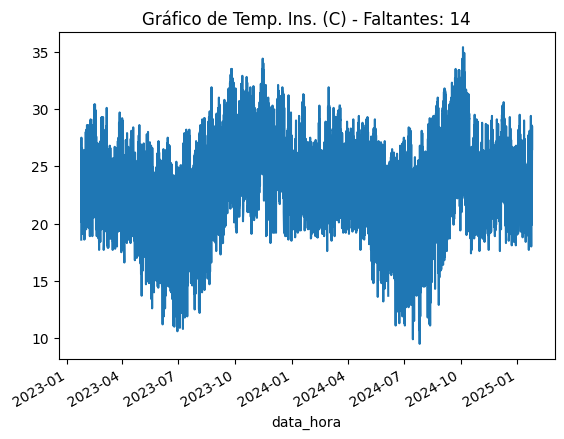

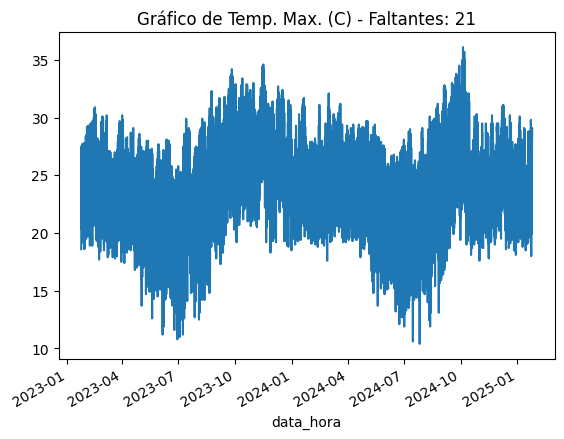

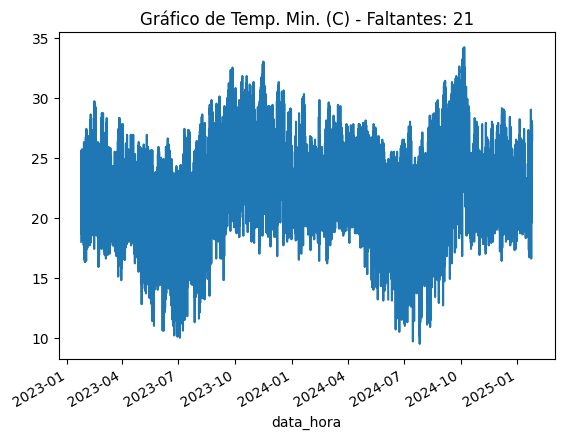

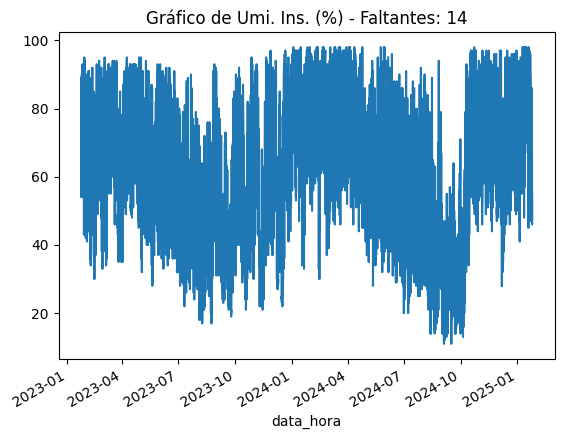

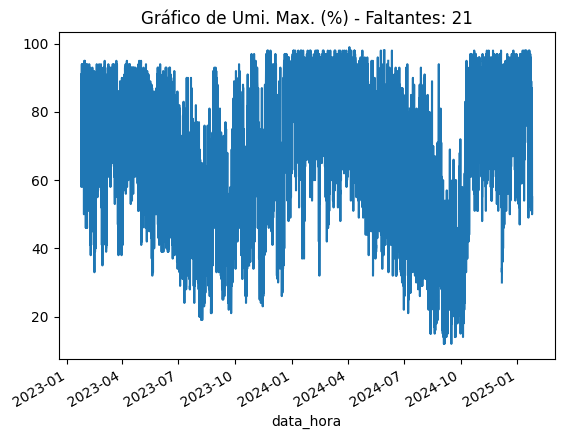

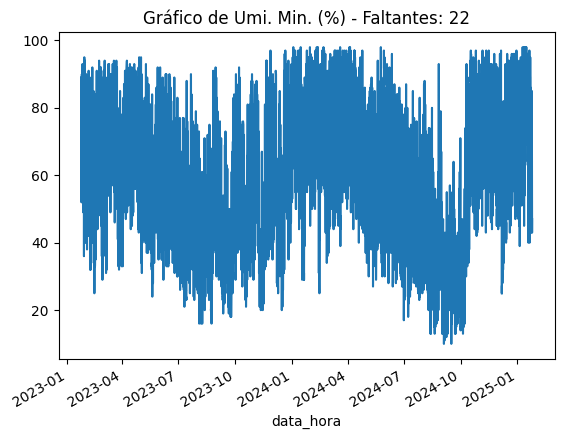

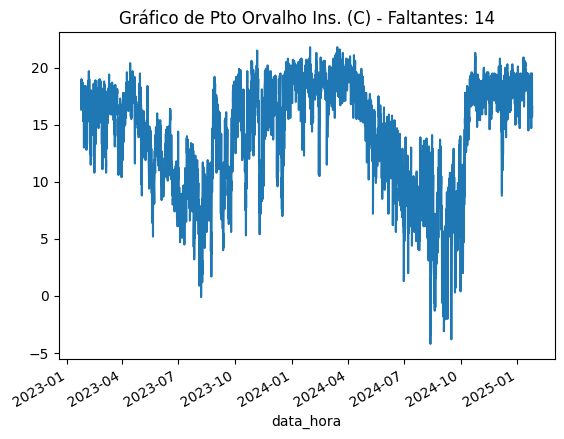

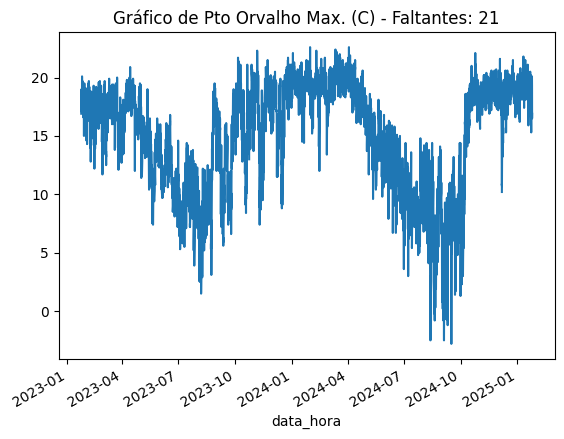

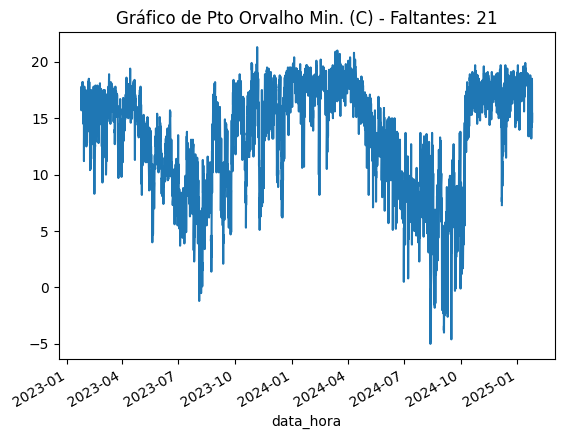

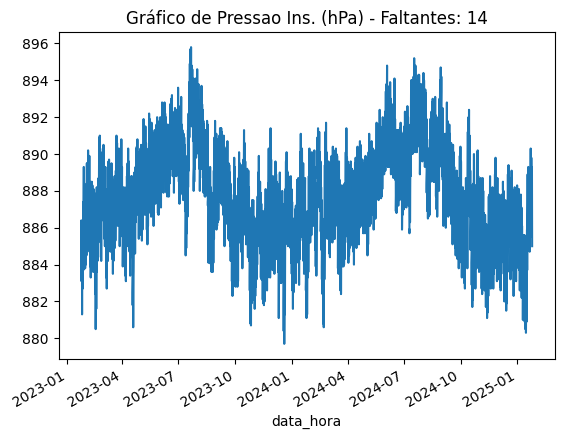

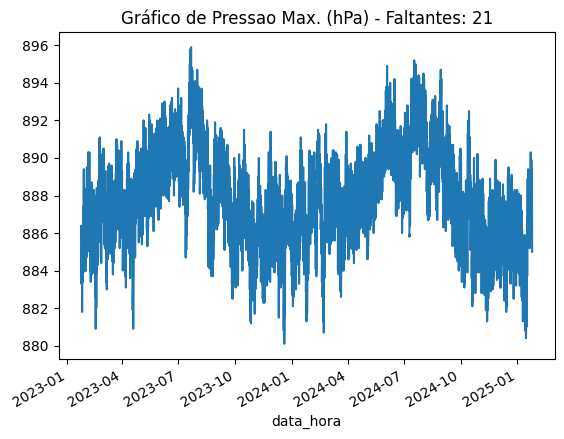

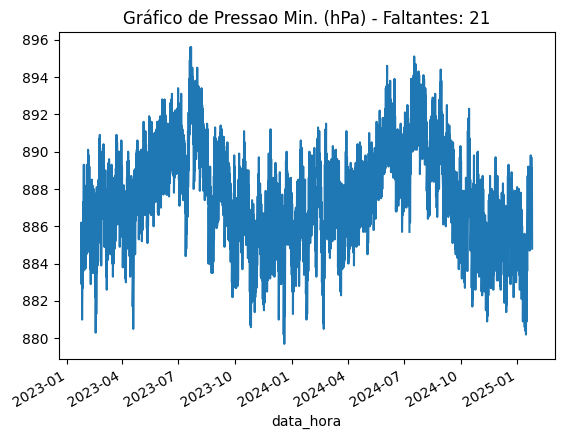

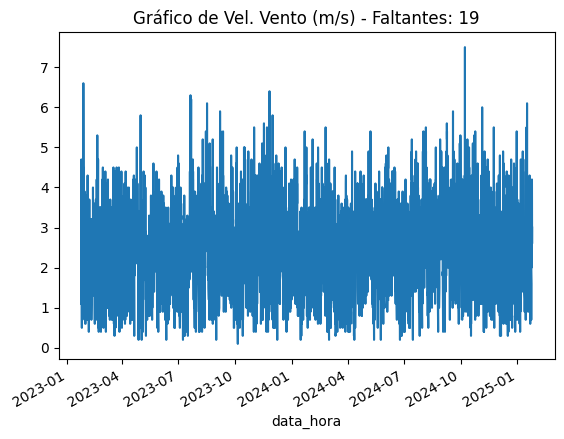

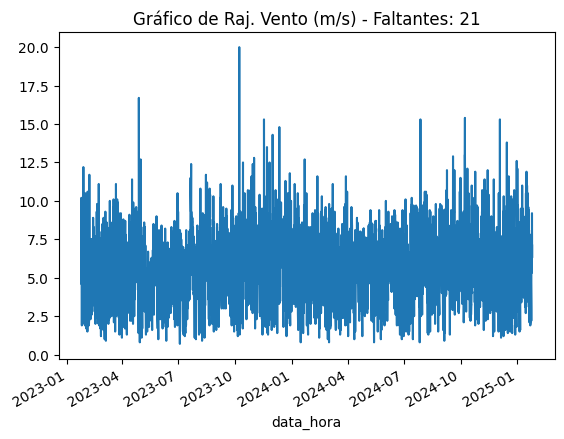

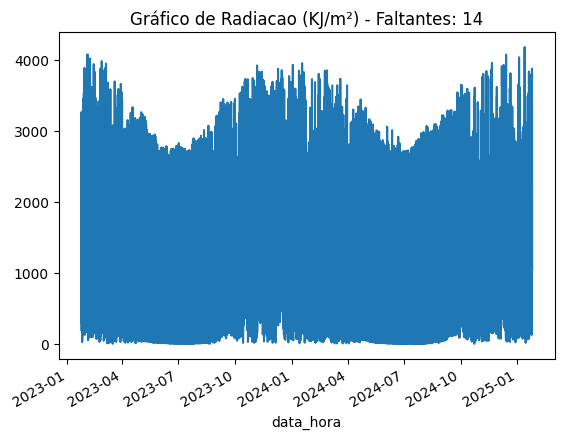

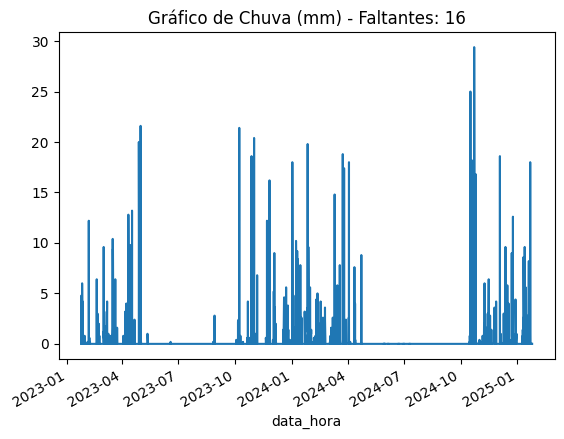

In [15]:
numericas = df_cleaned[['Temp. Ins. (C)', 'Temp. Max. (C)',
       'Temp. Min. (C)', 'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)',
       'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)',
       'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)',
       'Vel. Vento (m/s)', 'Raj. Vento (m/s)',
       'Radiacao (KJ/m²)', 'Chuva (mm)']]
for coluna in numericas:
    num_faltantes = df_cleaned[coluna].isna().sum()
    df_cleaned[coluna].plot()
    plt.title(f"Gráfico de {coluna} - Faltantes: {num_faltantes}")
    plt.show()


<h2>Checkpoint2</h2>

In [16]:
df_cleaned2 = df_cleaned.copy()

In [17]:
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2023-01-24 10:00:00 to 2025-01-24 21:00:00
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  8784 non-null   object 
 1   Hora (UTC)            8784 non-null   int64  
 2   Temp. Ins. (C)        8770 non-null   float64
 3   Temp. Max. (C)        8763 non-null   float64
 4   Temp. Min. (C)        8763 non-null   float64
 5   Umi. Ins. (%)         8770 non-null   float64
 6   Umi. Max. (%)         8763 non-null   float64
 7   Umi. Min. (%)         8762 non-null   float64
 8   Pto Orvalho Ins. (C)  8770 non-null   float64
 9   Pto Orvalho Max. (C)  8763 non-null   float64
 10  Pto Orvalho Min. (C)  8763 non-null   float64
 11  Pressao Ins. (hPa)    8770 non-null   float64
 12  Pressao Max. (hPa)    8763 non-null   float64
 13  Pressao Min. (hPa)    8763 non-null   float64
 14  Vel. Vento (m/s)      8765 non-null 

In [18]:
# Seleciona apenas as colunas numéricas
df_cleaned2_numeric = df_cleaned2.select_dtypes(include=['number'])

# Interpola apenas as colunas numéricas
df_cleaned2_numeric = df_cleaned2_numeric.interpolate(limit_direction='both')

# Atualiza o DataFrame original com as colunas interpoladas
df_cleaned2[df_cleaned2_numeric.columns] = df_cleaned2_numeric


In [19]:
df_cleaned2.isnull().sum()

Data                    0
Hora (UTC)              0
Temp. Ins. (C)          0
Temp. Max. (C)          0
Temp. Min. (C)          0
Umi. Ins. (%)           0
Umi. Max. (%)           0
Umi. Min. (%)           0
Pto Orvalho Ins. (C)    0
Pto Orvalho Max. (C)    0
Pto Orvalho Min. (C)    0
Pressao Ins. (hPa)      0
Pressao Max. (hPa)      0
Pressao Min. (hPa)      0
Vel. Vento (m/s)        0
Dir. Vento (m/s)        0
Raj. Vento (m/s)        0
Radiacao (KJ/m²)        0
Chuva (mm)              0
hora                    0
dtype: int64

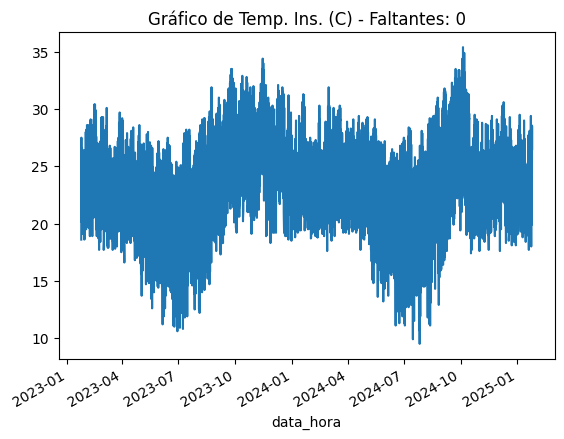

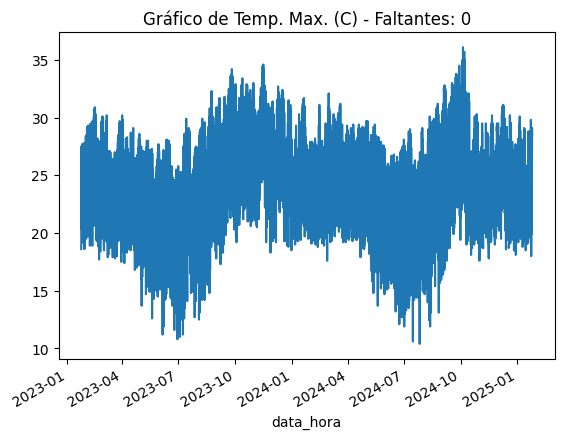

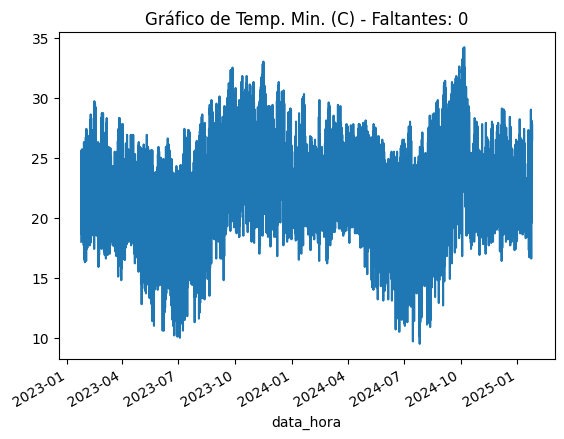

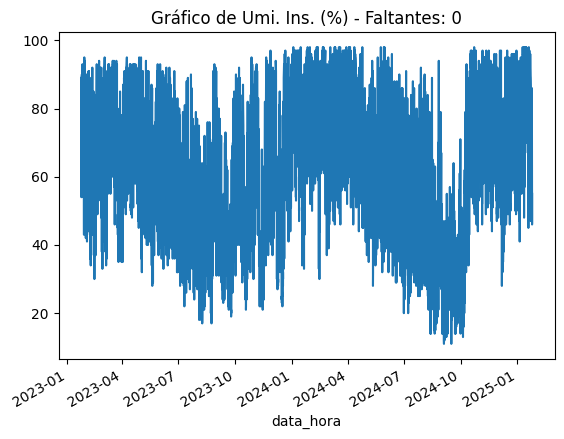

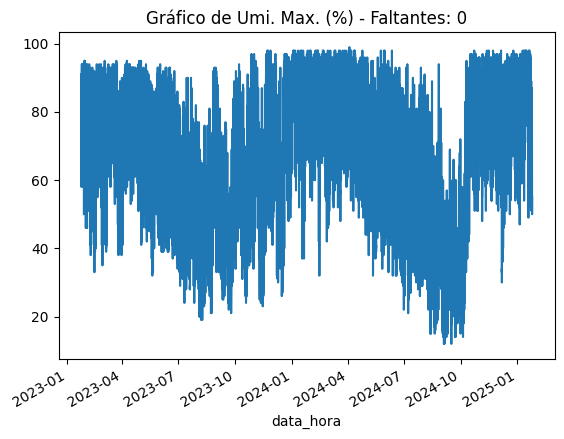

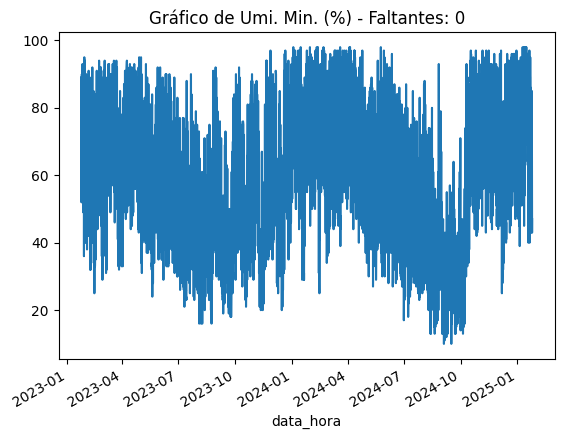

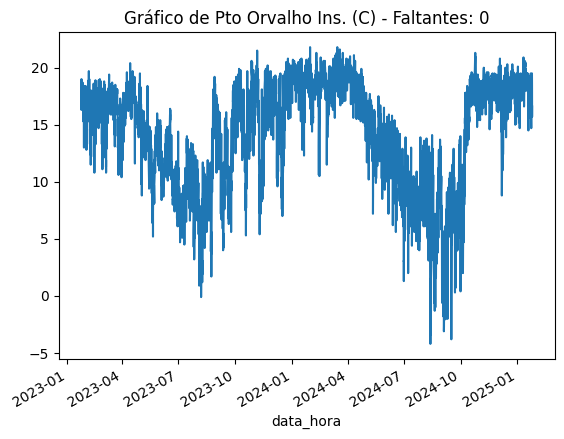

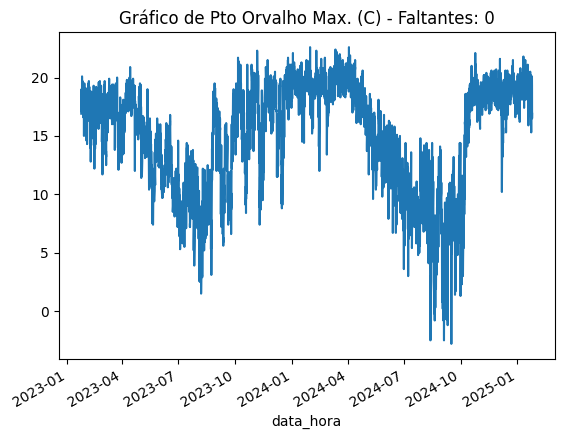

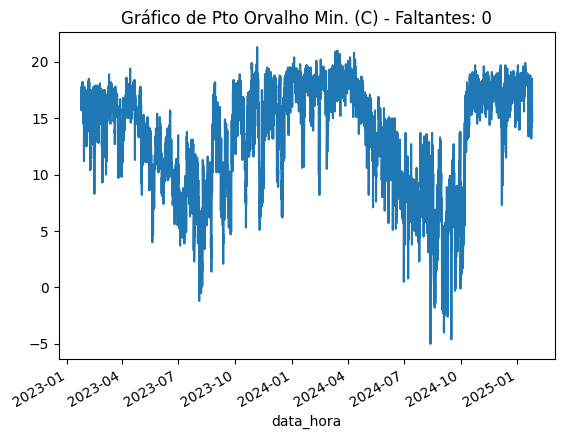

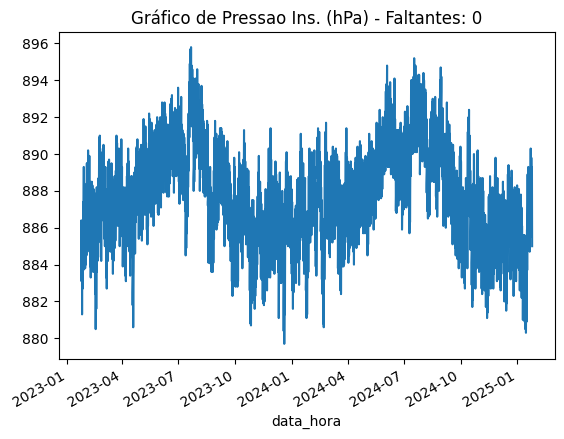

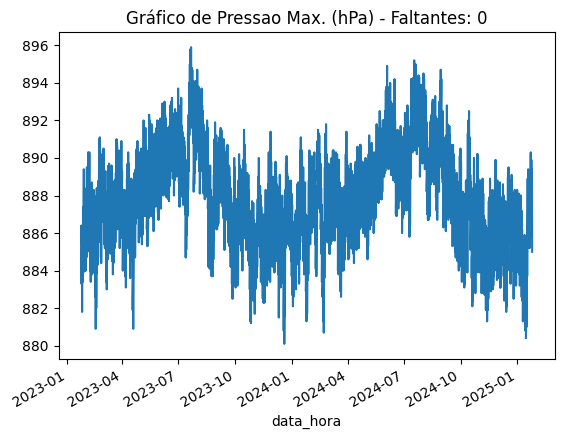

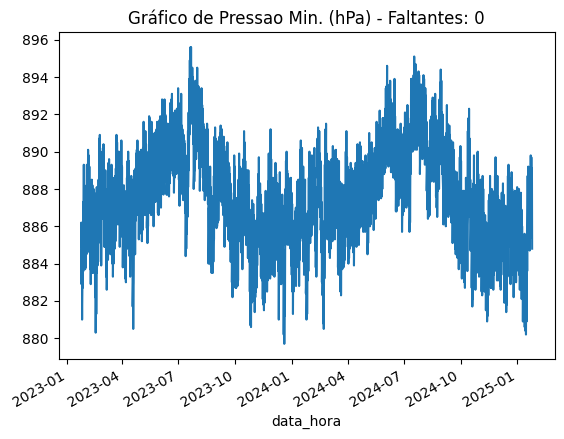

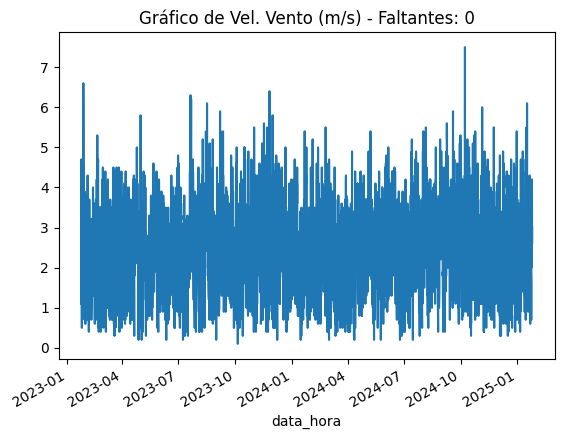

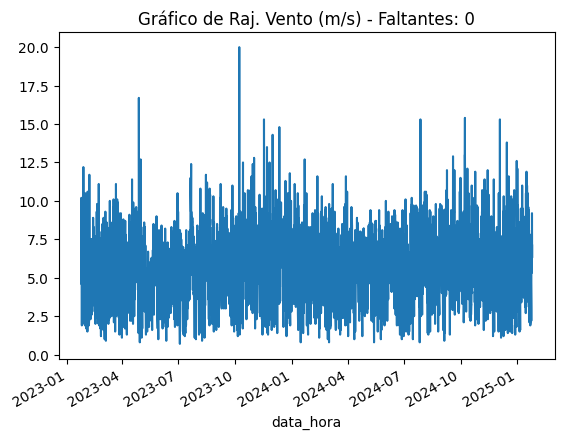

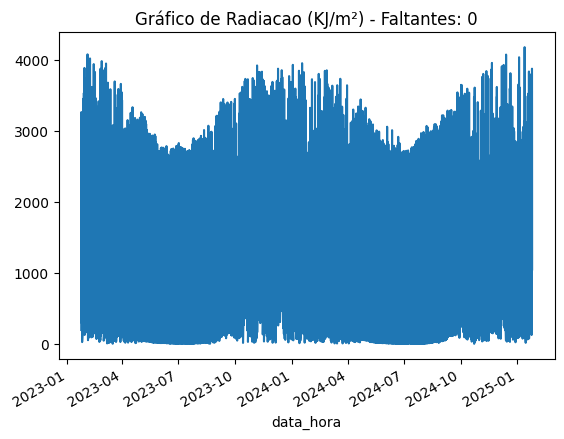

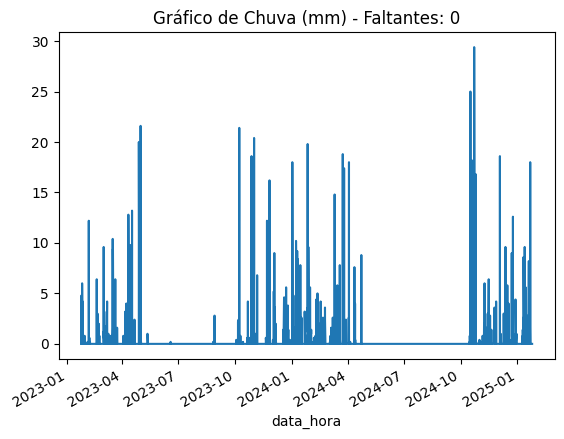

In [20]:
numericas = df_cleaned2[['Temp. Ins. (C)', 'Temp. Max. (C)',
       'Temp. Min. (C)', 'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)',
       'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)',
       'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)',
       'Vel. Vento (m/s)', 'Raj. Vento (m/s)',
       'Radiacao (KJ/m²)', 'Chuva (mm)']]
for coluna in numericas:
    num_faltantes = df_cleaned2[coluna].isna().sum()
    df_cleaned2[coluna].plot()
    plt.title(f"Gráfico de {coluna} - Faltantes: {num_faltantes}")
    plt.show()

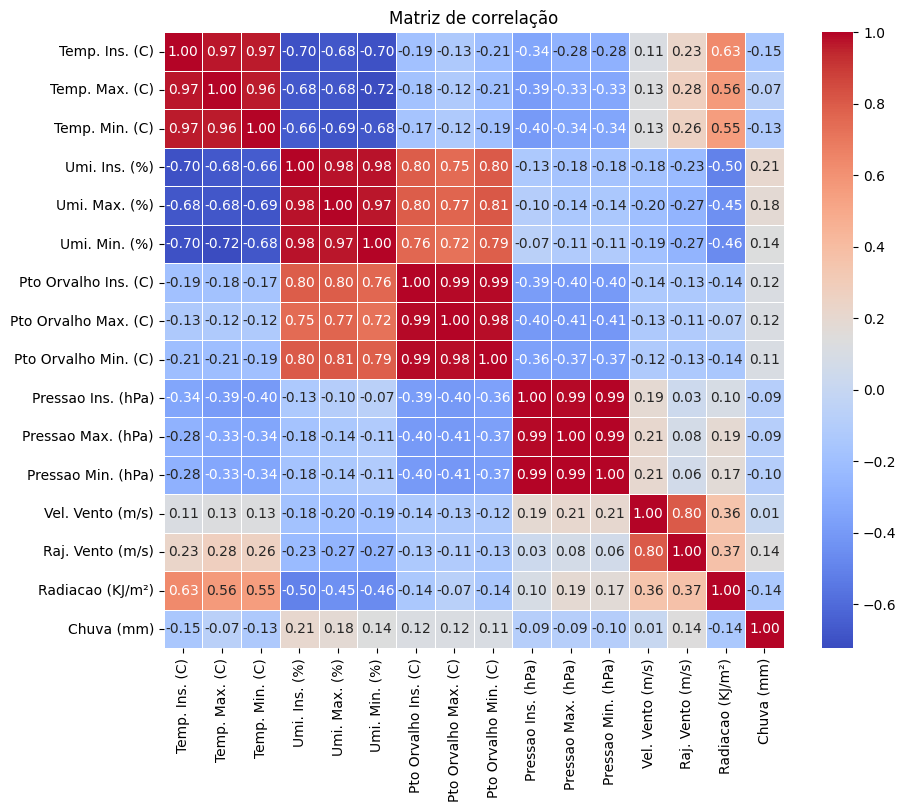

In [21]:
#Coeficiente de Pearson para verificação da correlação entre as variáveis
correlation_matrix = numericas.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap = 'coolwarm',fmt=".2f",linewidth=0.5)
plt.title('Matriz de correlação')
plt.show()

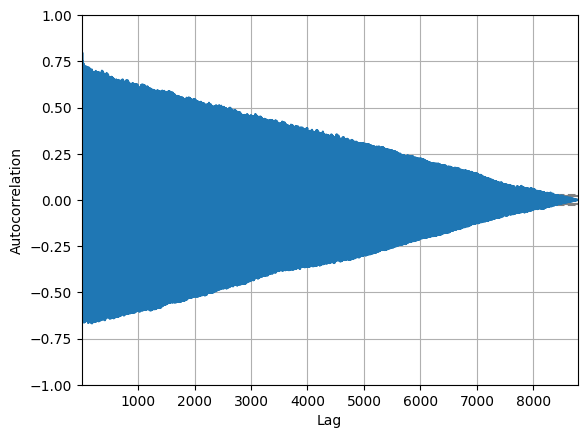

In [22]:
#Autocorrelação de Radiação
x = pd.plotting.autocorrelation_plot(df_cleaned2['Radiacao (KJ/m²)']) 
x.plot()
plt.show()

<h2>Checkpoint 3</2>

In [23]:
df_cleaned3 = df_cleaned2.copy()

In [24]:
df_cleaned3 = df_cleaned3.drop(['Data'],axis=1)

In [25]:
df_cleaned3 = df_cleaned3.drop(['Hora (UTC)'],axis=1)
df_cleaned3 = df_cleaned3.drop(['hora'],axis=1)

In [26]:
df_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2023-01-24 10:00:00 to 2025-01-24 21:00:00
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temp. Ins. (C)        8784 non-null   float64
 1   Temp. Max. (C)        8784 non-null   float64
 2   Temp. Min. (C)        8784 non-null   float64
 3   Umi. Ins. (%)         8784 non-null   float64
 4   Umi. Max. (%)         8784 non-null   float64
 5   Umi. Min. (%)         8784 non-null   float64
 6   Pto Orvalho Ins. (C)  8784 non-null   float64
 7   Pto Orvalho Max. (C)  8784 non-null   float64
 8   Pto Orvalho Min. (C)  8784 non-null   float64
 9   Pressao Ins. (hPa)    8784 non-null   float64
 10  Pressao Max. (hPa)    8784 non-null   float64
 11  Pressao Min. (hPa)    8784 non-null   float64
 12  Vel. Vento (m/s)      8784 non-null   float64
 13  Dir. Vento (m/s)      8784 non-null   float64
 14  Raj. Vento (m/s)      8784 non-null 

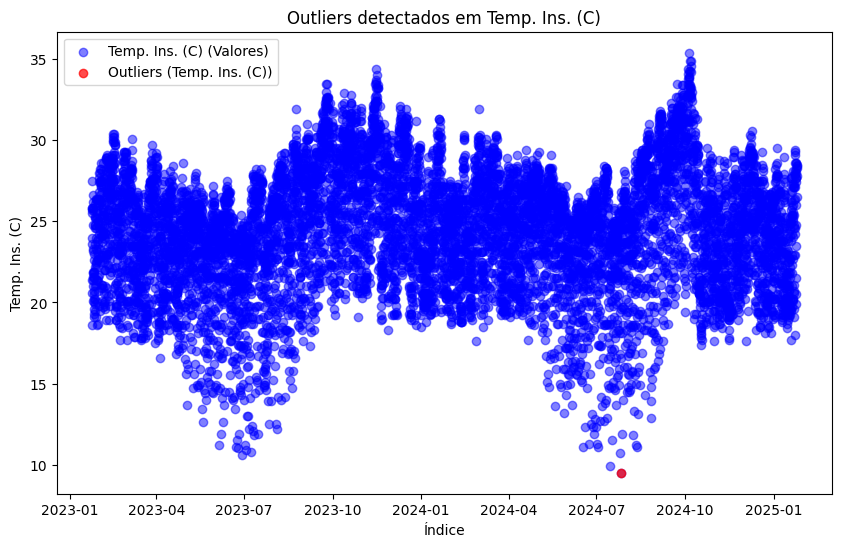

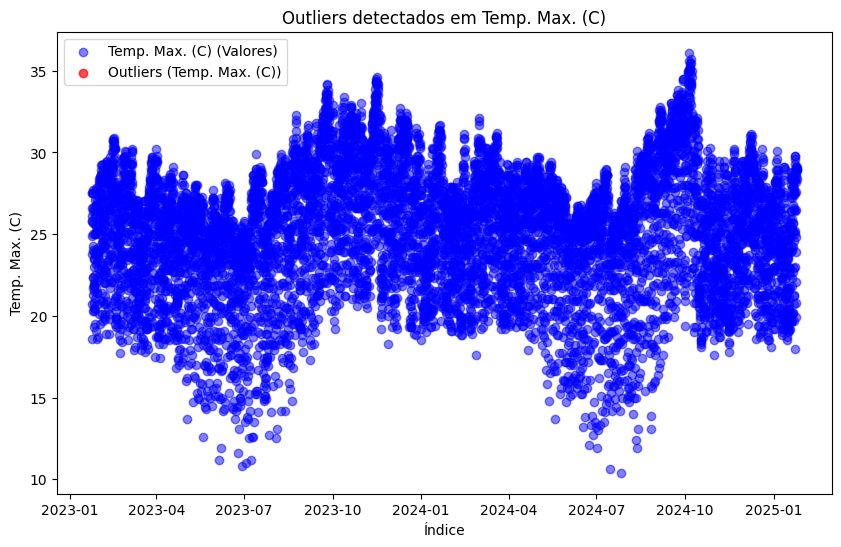

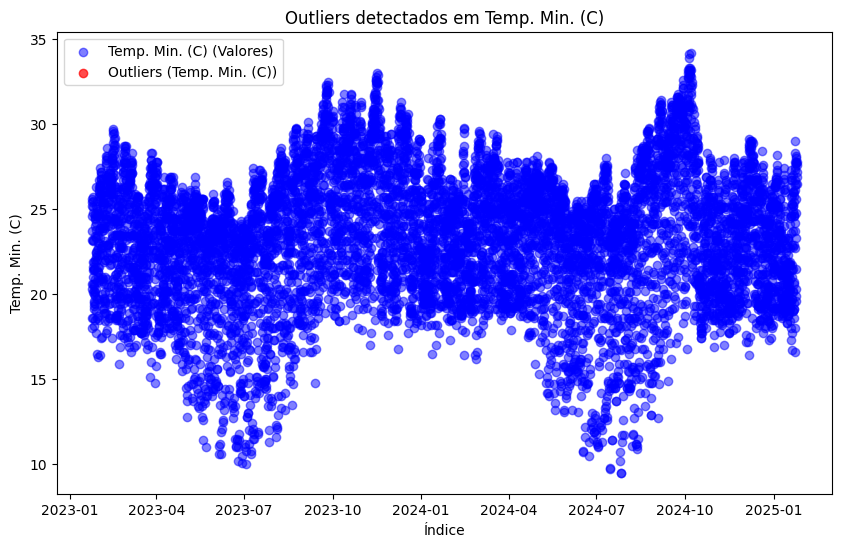

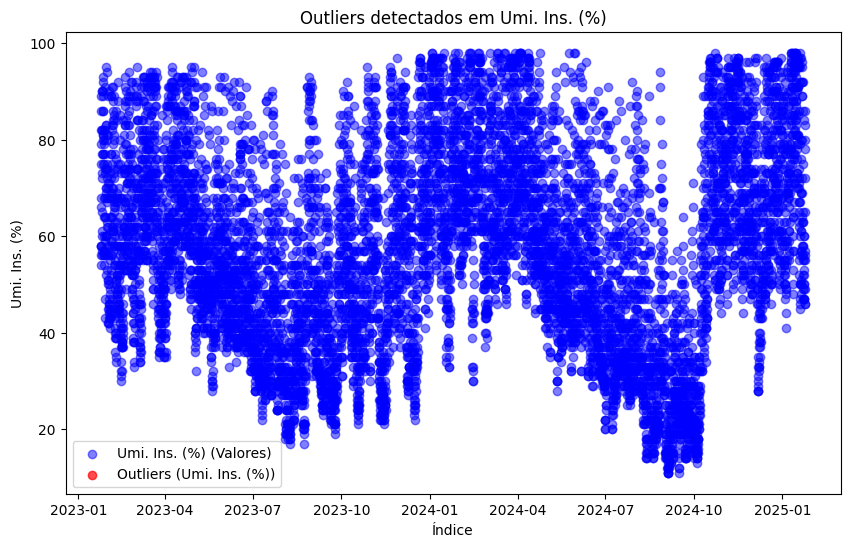

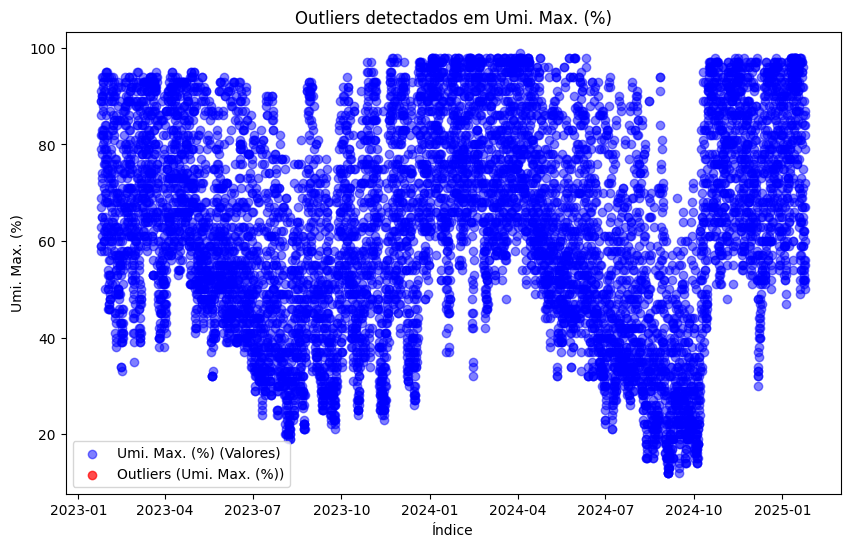

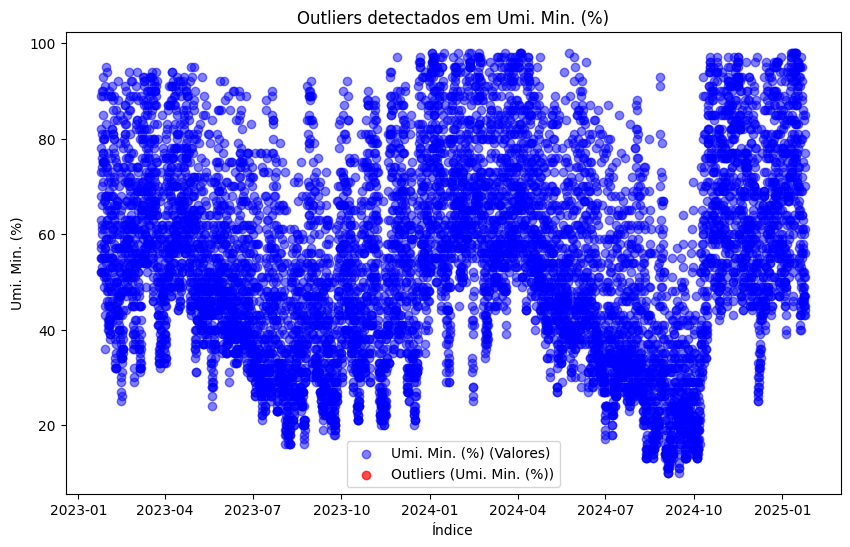

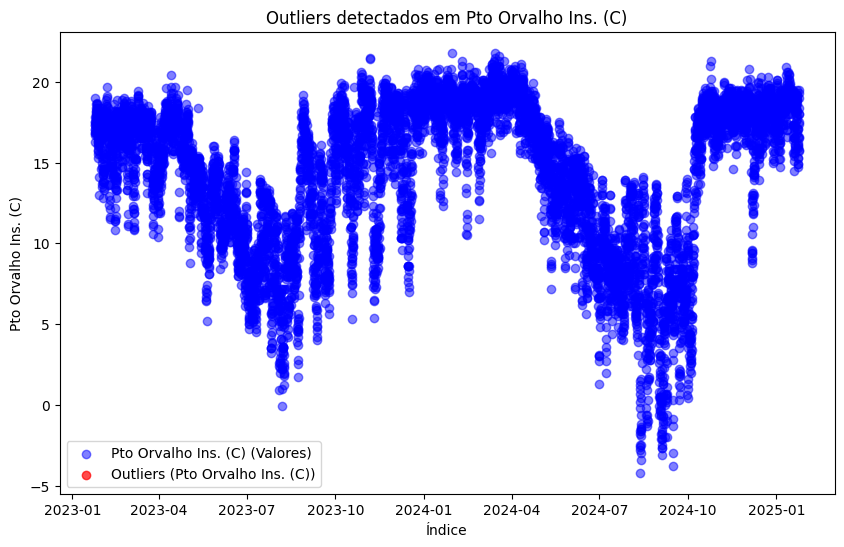

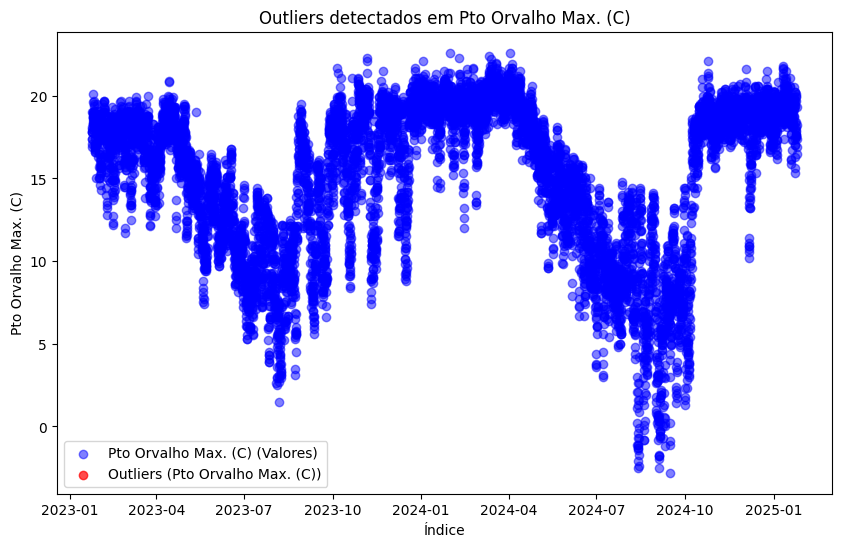

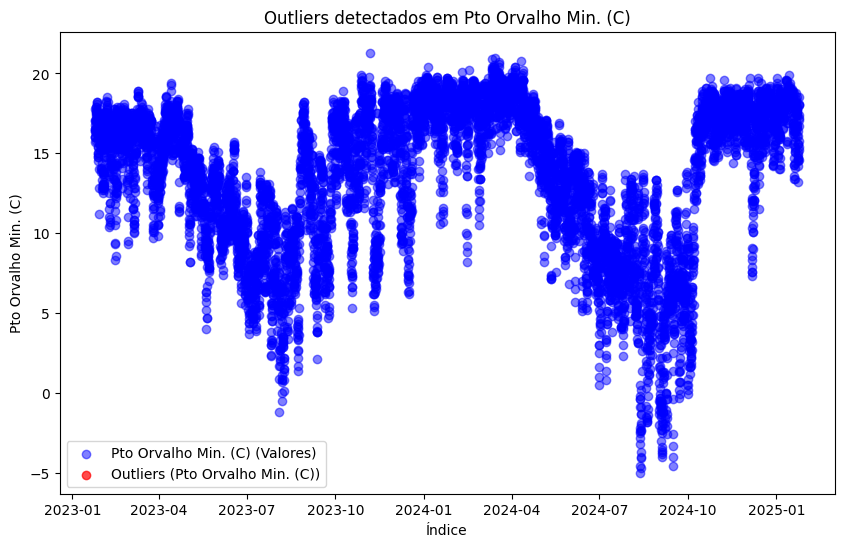

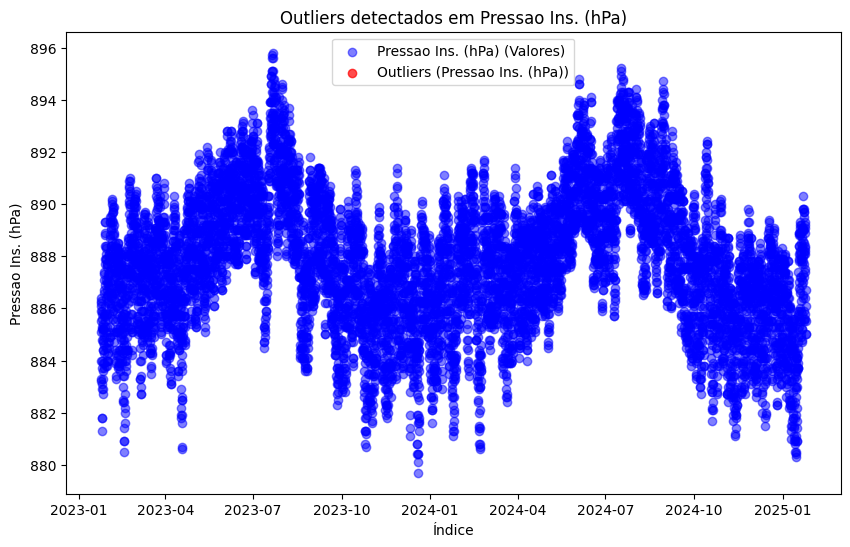

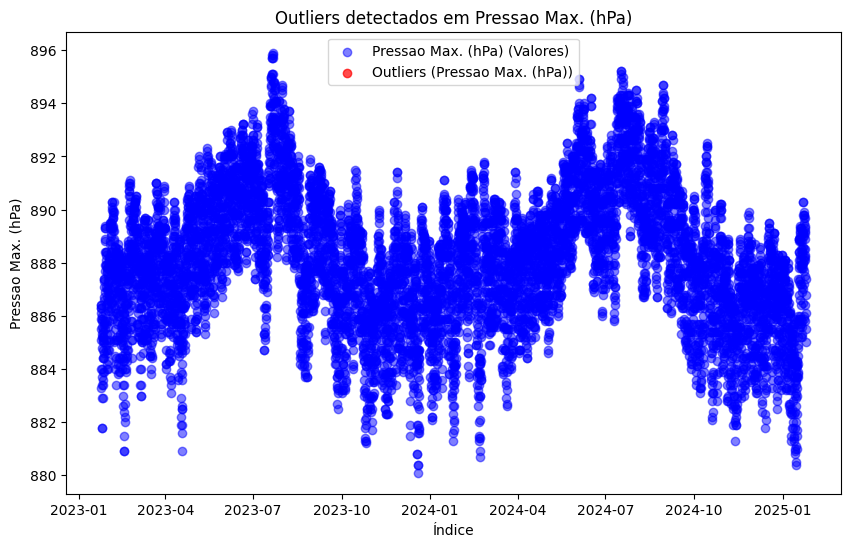

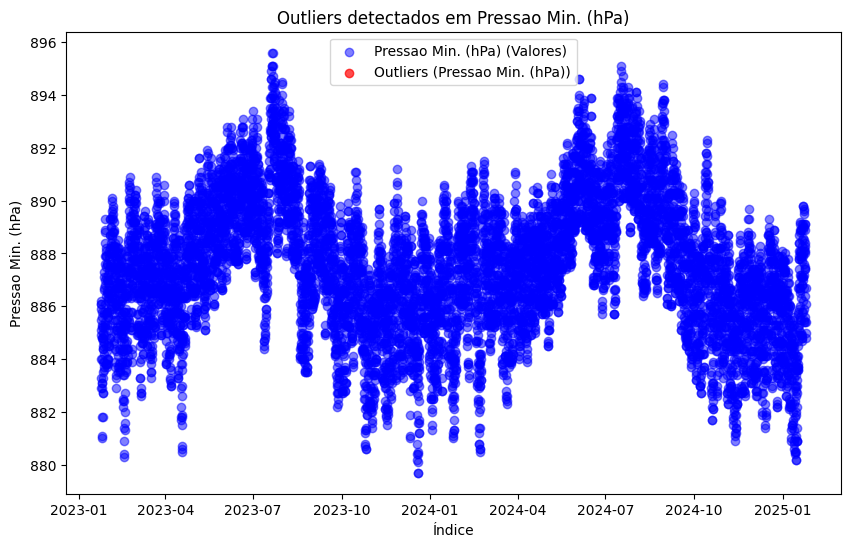

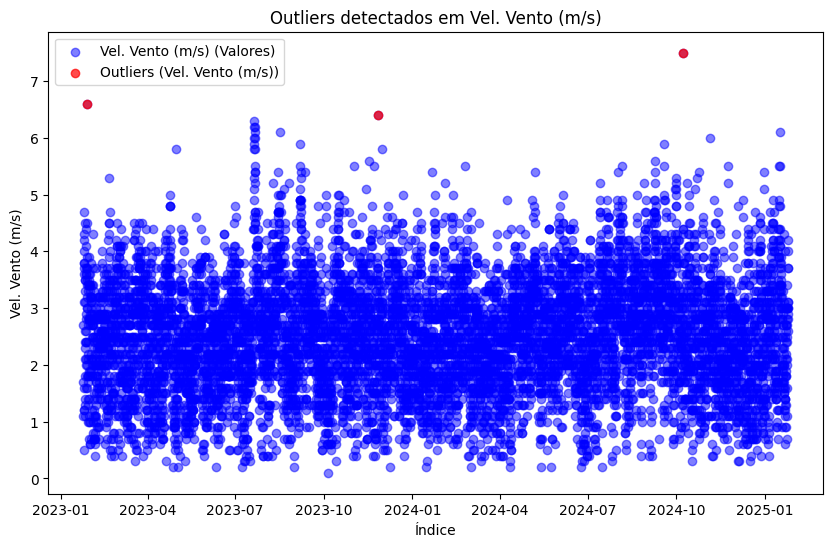

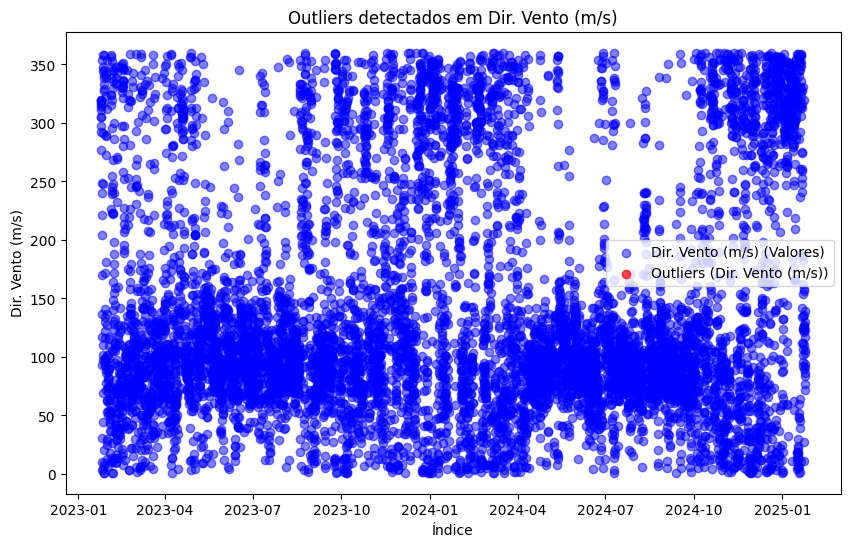

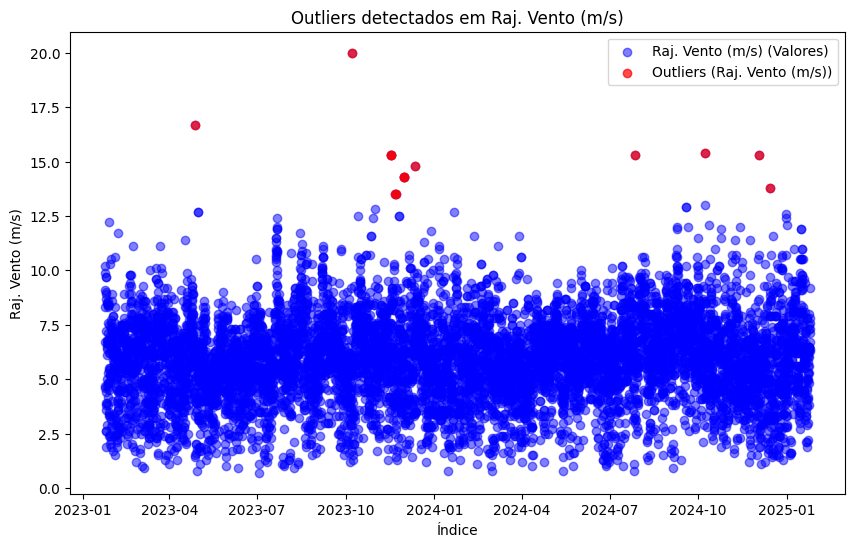

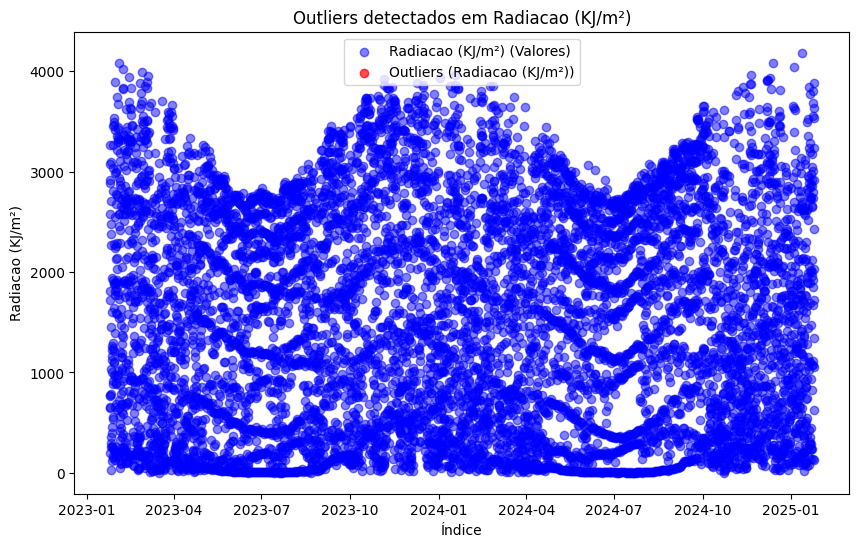

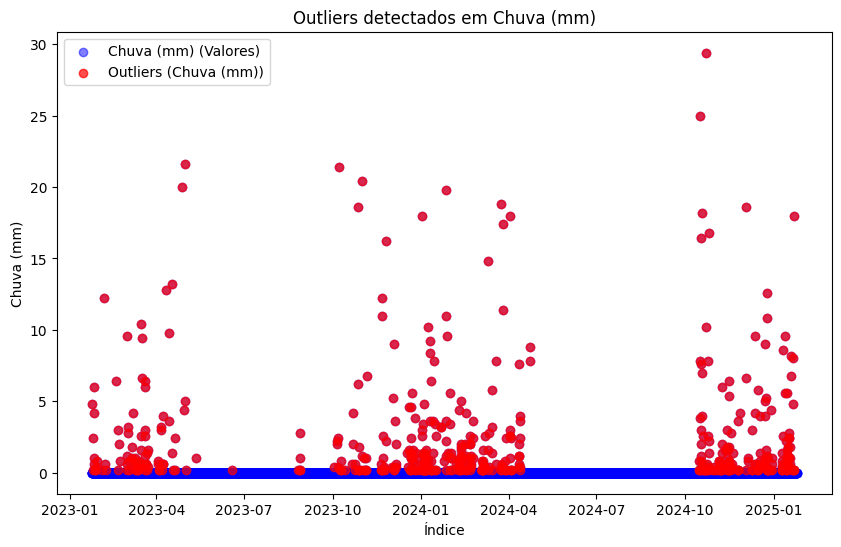

In [50]:
#Dataframe Completo
for coluna in df_cleaned3.columns:
        Q1 = df_cleaned3[coluna].quantile(0.25)
        Q3 = df_cleaned3[coluna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 2.5 * IQR
        
        outliers = df_cleaned3[(df_cleaned3[coluna] < lower_bound) | (df_cleaned3[coluna] > upper_bound)]
        #print(f"\nOutliers detectados em {coluna}:")
        #print(outliers)

        plt.figure(figsize=(10, 6))
        
        # Plotando todos os pontos
        plt.scatter(df_cleaned3.index, df_cleaned3[coluna], label=f'{coluna} (Valores)', color='blue', alpha=0.5)
        
        # Plotando os outliers em vermelho
        plt.scatter(outliers.index, outliers[coluna], label=f'Outliers ({coluna})', color='red', alpha=0.7)
        
        # Adicionando título e rótulos
        plt.title(f"Outliers detectados em {coluna}")
        plt.xlabel('Índice')
        plt.ylabel(f'{coluna}')
        
        # Exibindo legenda
        plt.legend()
        
        # Exibindo o gráfico
        plt.show()

In [28]:
df_cleaned3['Temp. Max. (C)'].min()

np.float64(10.4)

In [29]:
df_cleaned3['Temp. Max. (C)'].max()

np.float64(36.1)

In [30]:
#from scipy.stats import hmean
# Substituir outliers pela média harmônica
#for coluna in df_cleaned3.columns:
    # Calcular os quartis e o intervalo interquartil (IQR)
  #  Q1 = df_cleaned3[coluna].quantile(0.25)
  #  Q3 = df_cleaned3[coluna].quantile(0.75)
  #  IQR = Q3 - Q1
   # lower_bound = Q1 - 1.5 * IQR
   # upper_bound = Q3 + 1.5 * IQR
 
    # Filtrar os valores dentro dos limites para calcular a média harmônica
   # valores_validos = df_cleaned3[coluna][(df_cleaned3[coluna] >= lower_bound) & (df_cleaned3[coluna] <= upper_bound)]
 
    # Se houver valores válidos e positivos, calcular a média harmônica
  #  if not valores_validos.empty and all(valores_validos > 0):
   #     media_harmonica = hmean(valores_validos)
        # Substituir os outliers pela média harmônica
    #    df_cleaned3[coluna] = df_cleaned3[coluna].apply(lambda x: media_harmonica if (x < lower_bound or x > upper_bound) else x)
 
# Exibir a quantidade de valores alterados
#print("\nNúmero de outliers substituídos por média harmônica:")
#for coluna in df_cleaned3.columns:
   # outliers_substituidos = (df_cleaned3[coluna] < lower_bound) | (df_cleaned3[coluna] > upper_bound)
   # print(f"{coluna}: {outliers_substituidos.sum()} valores substituídos.")

In [31]:
df_cleaned3.to_csv('df_original_limpo.csv',index=True)

<h2>Checkpoint 4 - Resampling</h2>

In [32]:
df_resampled = df_cleaned3.resample('W').mean()

In [33]:
df_resampled.head()

Temp. Ins. (C)  Temp. Max. (C)  Temp. Min. (C)  Umi. Ins. (%)  \
data_hora                                                                   
2023-01-29       22.969444       23.934722       21.926389      71.111111   
2023-02-05       24.509524       25.198810       23.277381      62.500000   
2023-02-12       25.157143       25.711905       24.029762      58.785714   
2023-02-19       25.451190       26.028571       24.259524      58.630952   
2023-02-26       24.008333       24.713095       23.009524      66.119048   

            Umi. Max. (%)  Umi. Min. (%)  Pto Orvalho Ins. (C)  \
data_hora                                                        
2023-01-29      76.722222      66.416667             17.176389   
2023-02-05      68.726190      59.011905             16.428571   
2023-02-12      64.428571      56.071429             16.003571   
2023-02-19      64.285714      55.392857             16.033333   
2023-02-26      71.095238      62.321429             16.939286   

            Pto Orvalho Max. (C)  Pto Orvalho Min. (C)  Pressao Ins. (hPa)  \
data_hora                                                                    
2023-01-29             18.104167             16.406944          885.483333   
2023-02-05             17.429762             15.520238          887.184524   
2023-02-12             16.991667             15.226190          886.490476   
2023-02-19             16.938095             15.071429          885.277381   
2023-02-26             17.777381             16.035714          887.779762   

            Pressao Max. (hPa)  Pressao Min. (hPa)  Vel. Vento (m/s)  \
data_hora                                                              
2023-01-29          885.819444          885.222222          2.709722   
2023-02-05          887.535714          886.983333          2.294048   
2023-02-12          886.877381          886.265476          2.236905   
2023-02-19          885.655952          885.064286          2.513095   
2023-02-26          888.135714          887.547619          2.292857   

            Dir. Vento (m/s)  Raj. Vento (m/s)  Radiacao (KJ/m²)  Chuva (mm)  
data_hora                                                                     
2023-01-29        195.986111          6.022222       1580.177778    0.288889  
2023-02-05        133.404762          5.526190       1767.392857    0.147619  
2023-02-12        114.964286          5.552381       1762.996429    0.009524  
2023-02-19        147.797619          5.946429       1892.951190    0.114286  
2023-02-26        128.726190          5.638095       1735.534524    0.033333

In [34]:
df_resampled.shape

(105, 17)

In [35]:
df_resampled.index

DatetimeIndex(['2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05', '2023-03-12', '2023-03-19',
               '2023-03-26', '2023-04-02',
               ...
               '2024-11-24', '2024-12-01', '2024-12-08', '2024-12-15',
               '2024-12-22', '2024-12-29', '2025-01-05', '2025-01-12',
               '2025-01-19', '2025-01-26'],
              dtype='datetime64[ns]', name='data_hora', length=105, freq='W-SUN')

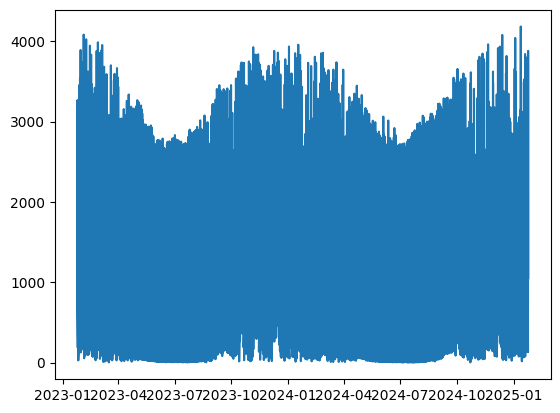

In [36]:
plt.plot(df_cleaned3.index,df_cleaned3['Radiacao (KJ/m²)'],label='Radiação de 2023 a 2025')
plt.show()

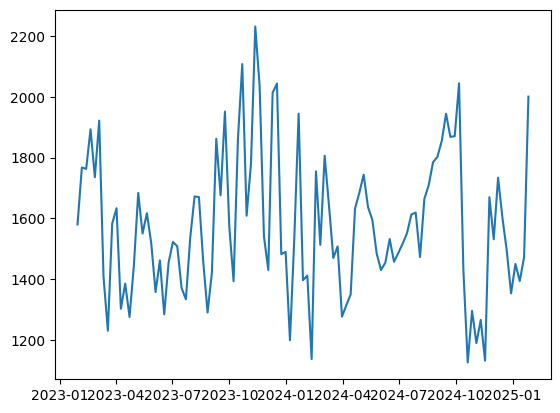

In [37]:
plt.plot(df_resampled.index,df_resampled['Radiacao (KJ/m²)'],label='Radiação de 2023 a 2025')
plt.show()

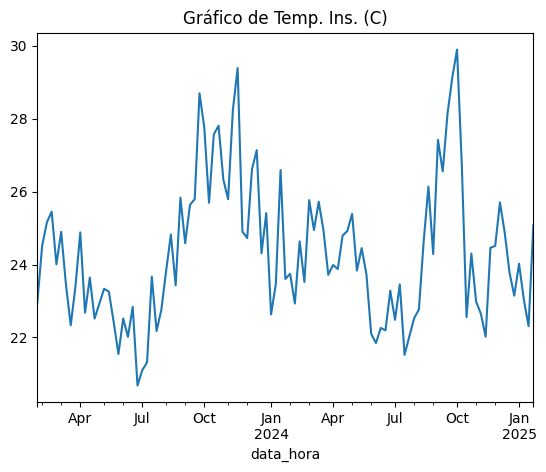

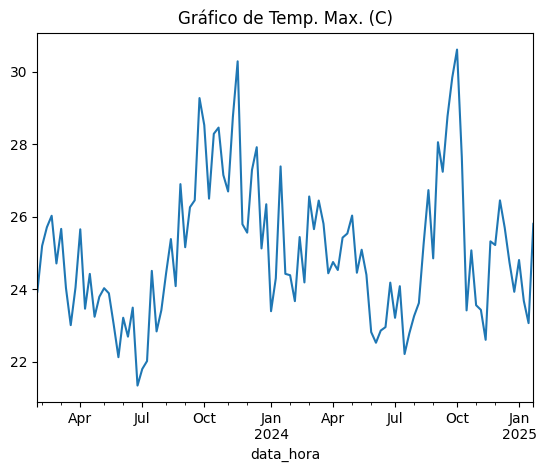

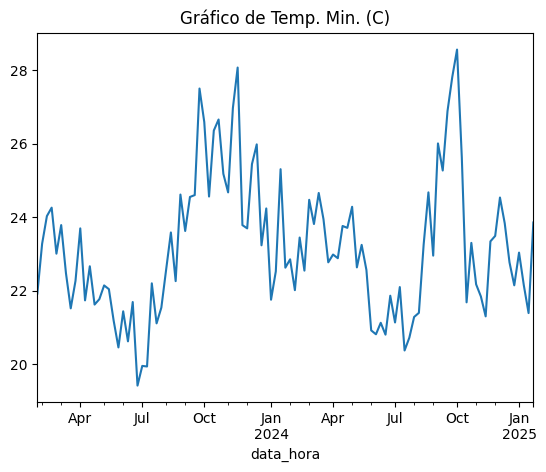

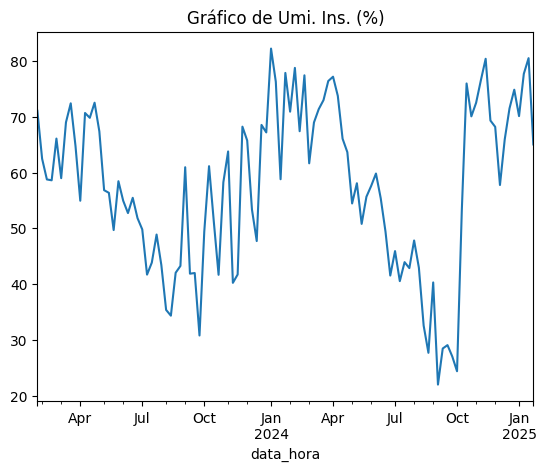

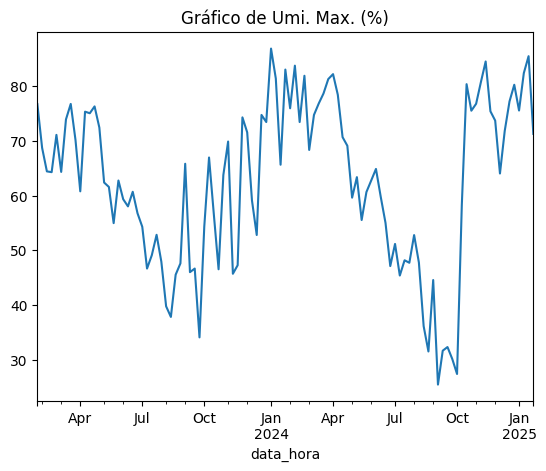

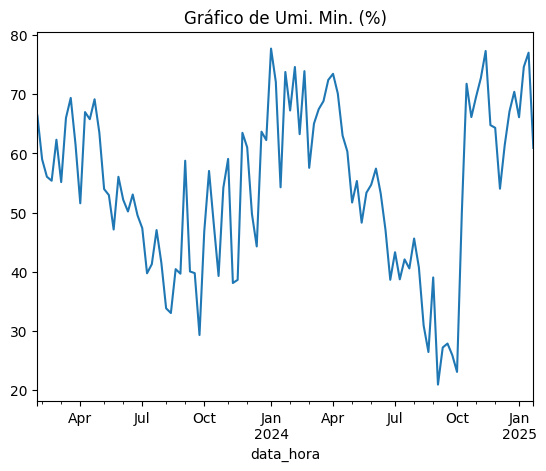

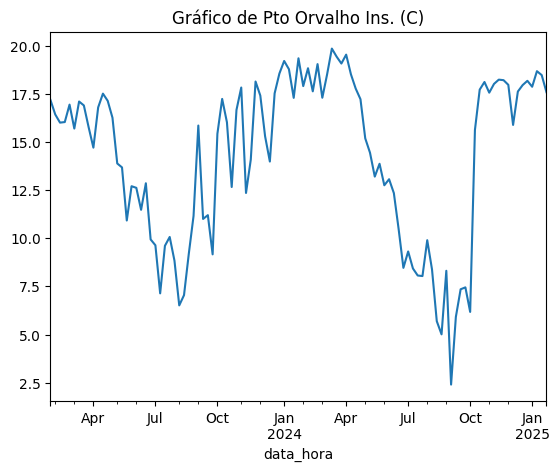

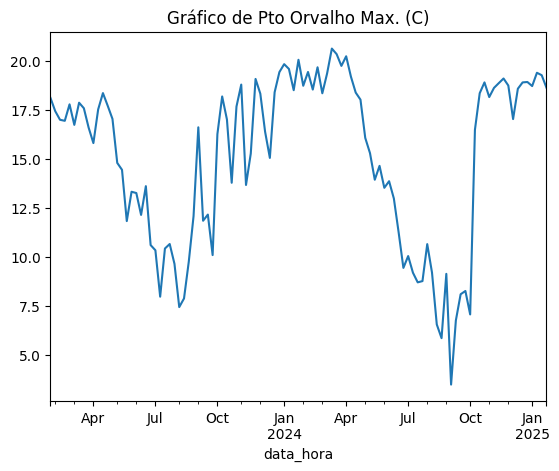

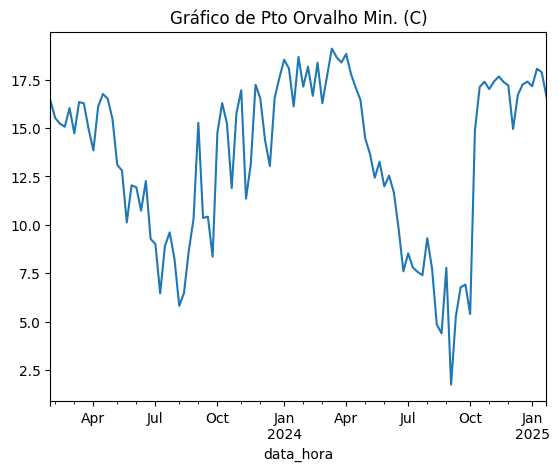

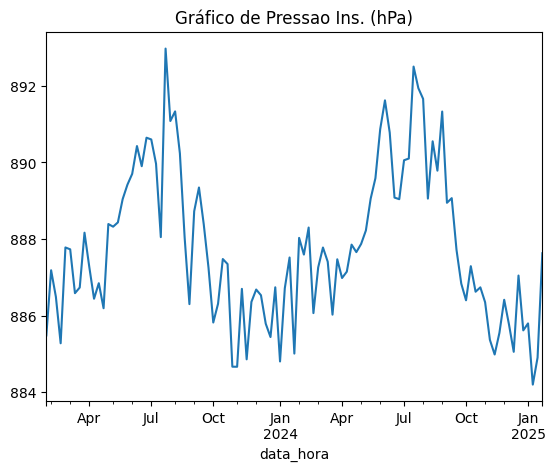

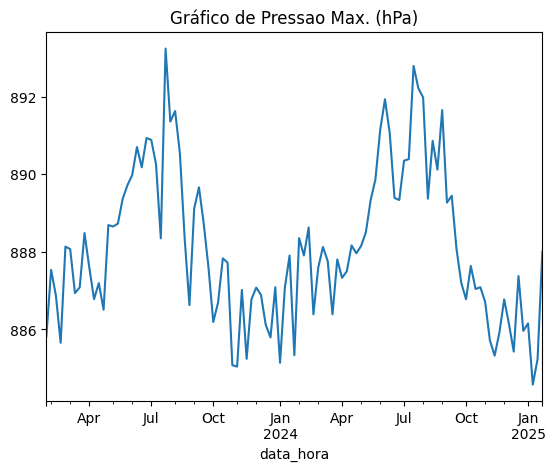

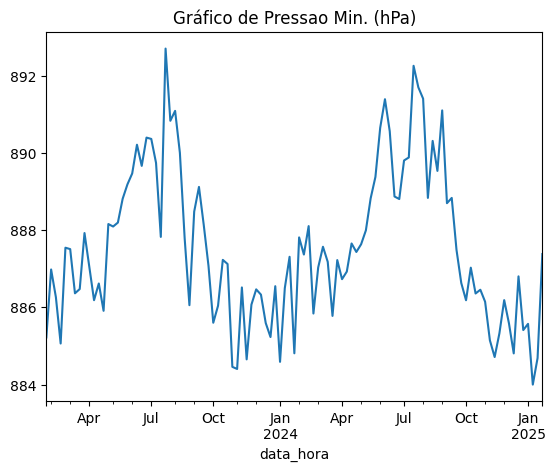

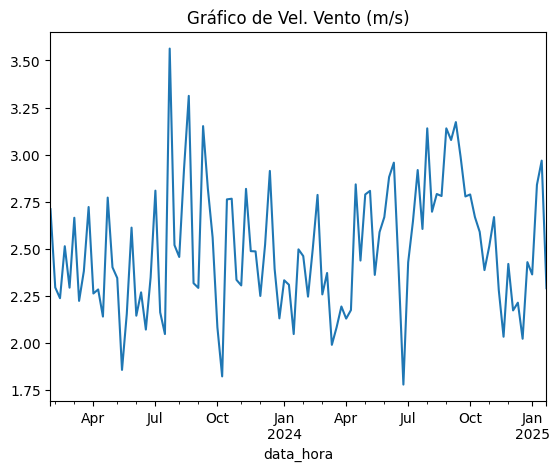

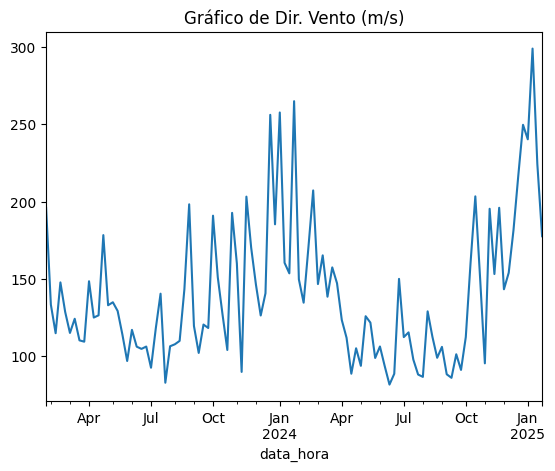

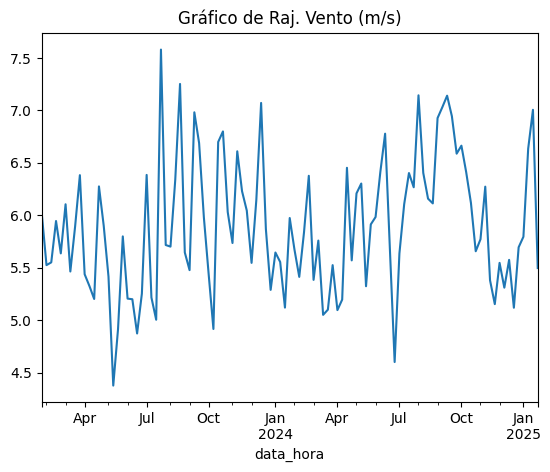

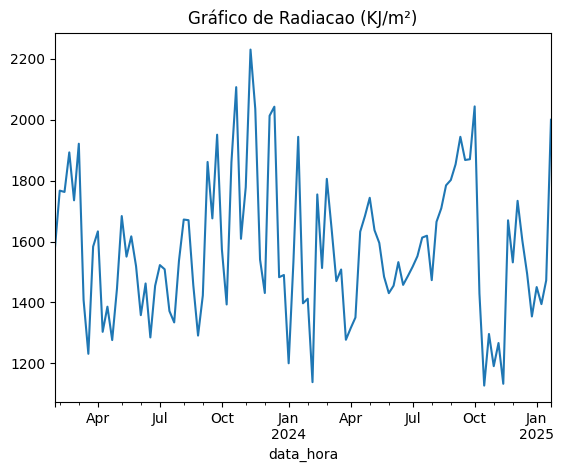

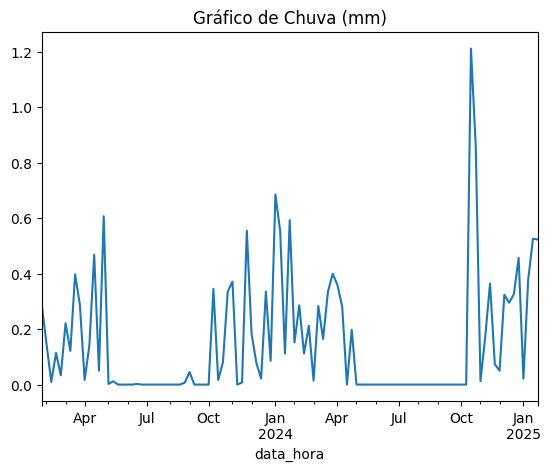

In [38]:
for coluna in df_resampled.columns:
    df_resampled[coluna].plot()
    plt.title(f"Gráfico de {coluna}")
    plt.show()

In [39]:
df_resampled.to_csv('df_resampled_com_outliers.csv',index=True)

In [40]:
from statsmodels.tsa.seasonal import STL

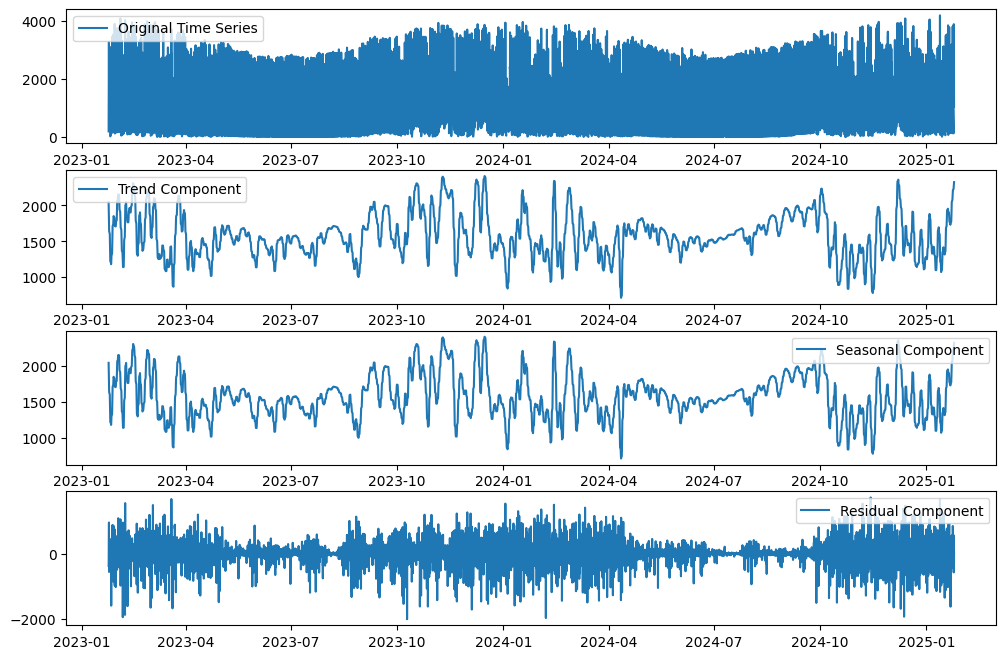

In [41]:
stl = STL(df_cleaned3['Radiacao (KJ/m²)'],period=24)
result = stl.fit()
trend = result.trend
seasonal = result.seasonal
residual = result.resid

#Plotagem
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_cleaned3['Radiacao (KJ/m²)'],label='Original Time Series')
plt.legend(loc='upper left')
plt.subplot(412)

plt.plot(trend,label='Trend Component')
plt.legend(loc='upper left')
plt.subplot(413)

plt.plot(trend,label='Seasonal Component')
plt.legend(loc='upper right')
plt.subplot(414)

plt.plot(residual,label='Residual Component')
plt.legend(loc='upper right')
plt.show()

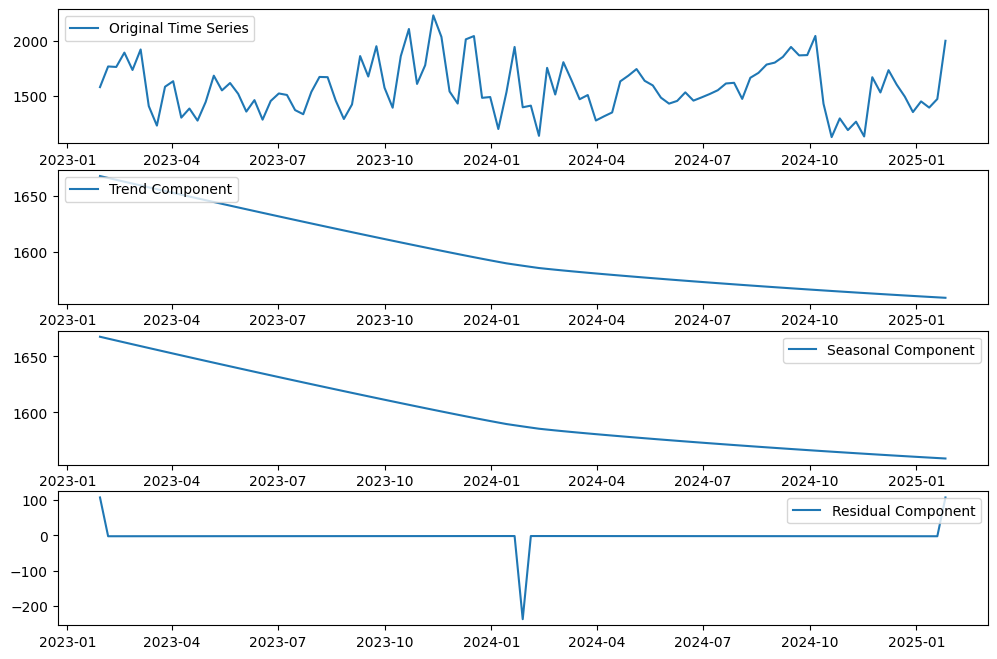

In [42]:
stl = STL(df_resampled['Radiacao (KJ/m²)'])
result = stl.fit()
trend = result.trend
seasonal = result.seasonal
residual = result.resid

#Plotagem
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_resampled['Radiacao (KJ/m²)'],label='Original Time Series')
plt.legend(loc='upper left')
plt.subplot(412)

plt.plot(trend,label='Trend Component')
plt.legend(loc='upper left')
plt.subplot(413)

plt.plot(trend,label='Seasonal Component')
plt.legend(loc='upper right')
plt.subplot(414)

plt.plot(residual,label='Residual Component')
plt.legend(loc='upper right')
plt.show()

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

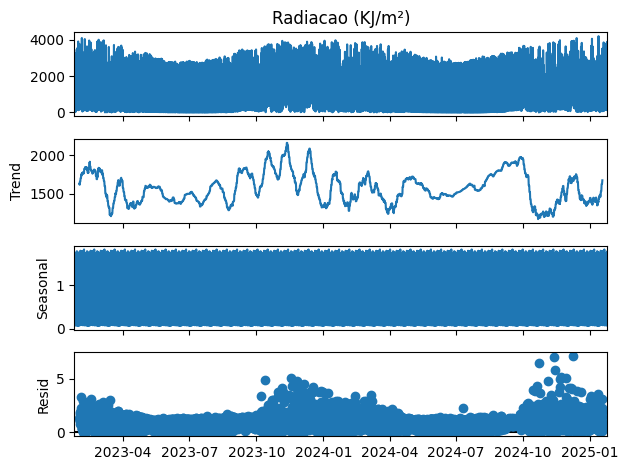

In [44]:
resultado = seasonal_decompose(df_cleaned3['Radiacao (KJ/m²)'],model='multiplicable',period=168)
resultado.plot()
plt.show()

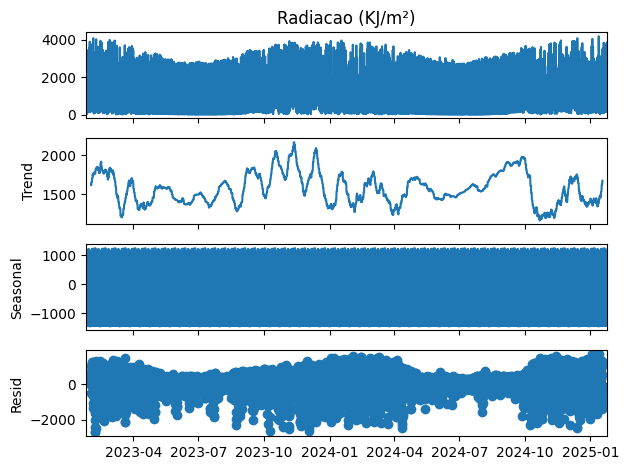

In [45]:
resultado = seasonal_decompose(df_cleaned3['Radiacao (KJ/m²)'],model='additive',period=168)
resultado.plot()
plt.show()

<h2>Identificando Trends</h2>

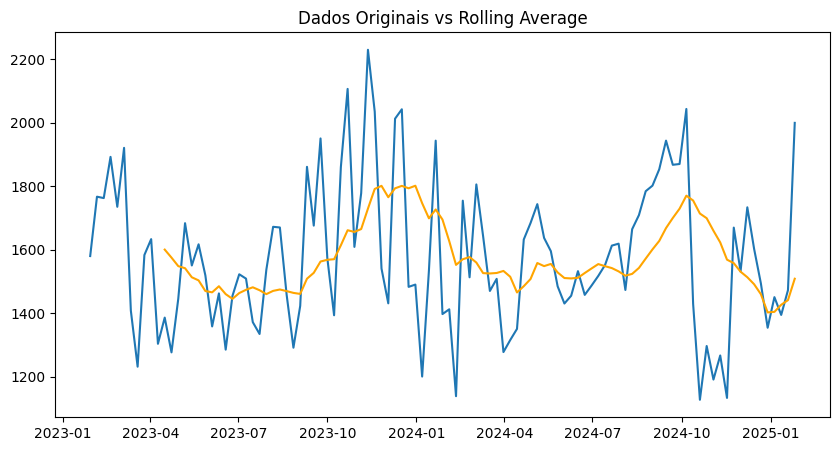

In [46]:
rolling_avg = df_resampled['Radiacao (KJ/m²)'].rolling(window=12).mean()
plt.figure(figsize=(10,5))
plt.plot(df_resampled['Radiacao (KJ/m²)'],label='Dados Originais')
plt.plot(rolling_avg,label='12-Meses Rolling Average',color='orange')
plt.title('Dados Originais vs Rolling Average')
plt.show()

<h2>Verificação de Estacionariedade</h2>

In [51]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [48]:
#for coluna in df_resampled.columns:
  #  stat = adfuller(df_resampled[coluna],autolag='AIC')
   # print(f"{coluna} tem stat {stat}")
    #if stat > 0.05:
       # print(f"Coluna {coluna} não é estacionária")
   # else:
      #  print(f"Coluna {coluna} não é estacionária")

In [53]:
adf_test(data_resaampled['Radiacao (KJ/m²)'])

NameError: name 'adf_test' is not defined